In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
def scatter_plot(title, y_predict):
  plt.figure(figsize=(12,12))
  plt.xticks(rotation=90)
  plt.title(title,fontsize = 16)
  plt.xlabel('Actual',fontsize = 15)
  plt.ylabel('Predictions', fontsize =15)
  plt.scatter(y_test,y_predict)
  plt.show()

In [ ]:
crop_df = pd.read_csv('/content/Crop_recommendation.csv')
crop_df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [ ]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop_df.duplicated().sum()

0

In [ ]:
crop_df.columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall','Label']

In [ ]:
crop_df.shape

(2200, 8)

In [ ]:
crop_df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH             0
Rainfall       0
Label          0
dtype: int64

In [ ]:
crop_df.describe()

Nitrogen   Phosphorus    Potassium  Temperature     Humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                pH     Rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
x = crop_df.iloc[:,:-1]
x

Nitrogen  Phosphorus  Potassium  Temperature   Humidity        pH  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        Rainfall  
0     202.935536  
1     226.655537  
2     263.964248  
3     242.864034  
4     262.717340  
...          ...  
2195  177.774507  
2196  127.924610  
2197  173.322839  
2198  127.175293  
2199  140.937041  

[2200 rows x 7 columns]

In [ ]:
y = crop_df.iloc[:,-1]
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: Label, Length: 2200, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
x_train.shape

(1760, 7)

In [ ]:
y_train.shape

(1760,)

In [ ]:
x_test.shape

(440, 7)

In [ ]:
y_test.shape

(440,)

In [ ]:
y_test.value_counts()

coconut        27
chickpea       26
mothbeans      24
jute           23
papaya         23
apple          23
pigeonpeas     23
pomegranate    23
maize          21
banana         21
blackgram      20
kidneybeans    20
watermelon     19
mungbean       19
mango          19
rice           19
coffee         17
cotton         17
muskmelon      17
orange         14
grapes         14
lentil         11
Name: Label, dtype: int64

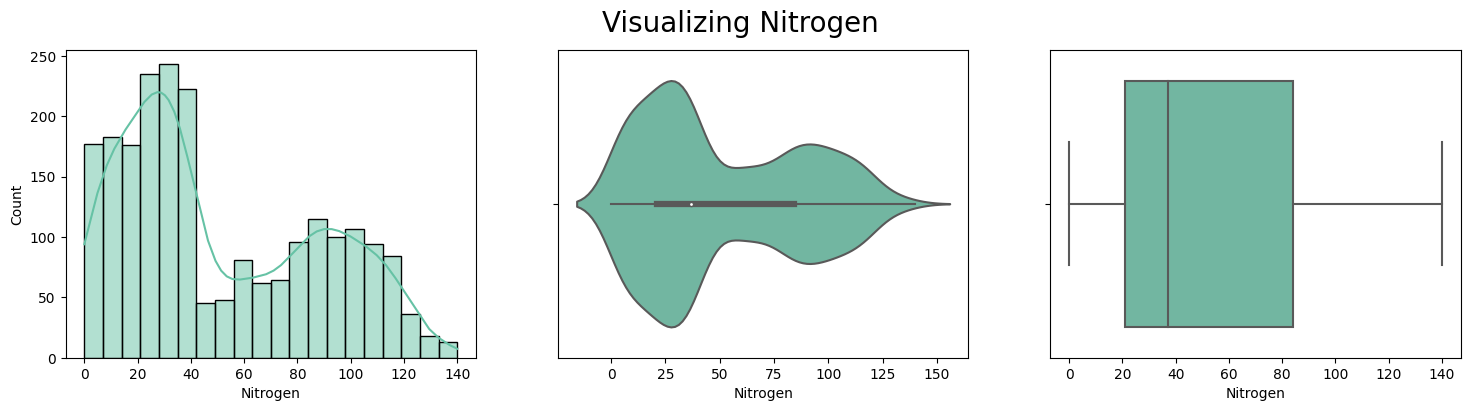

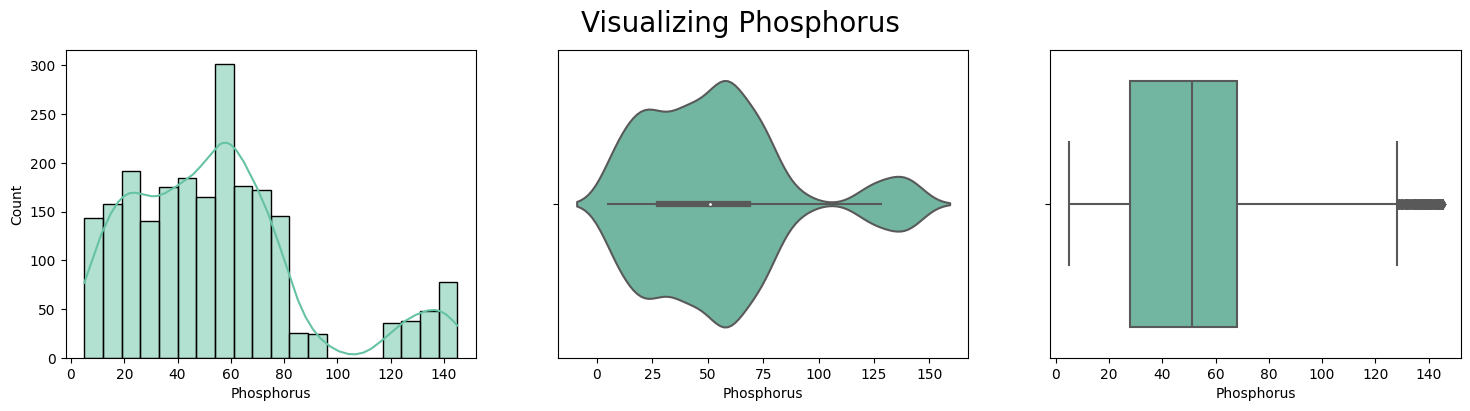

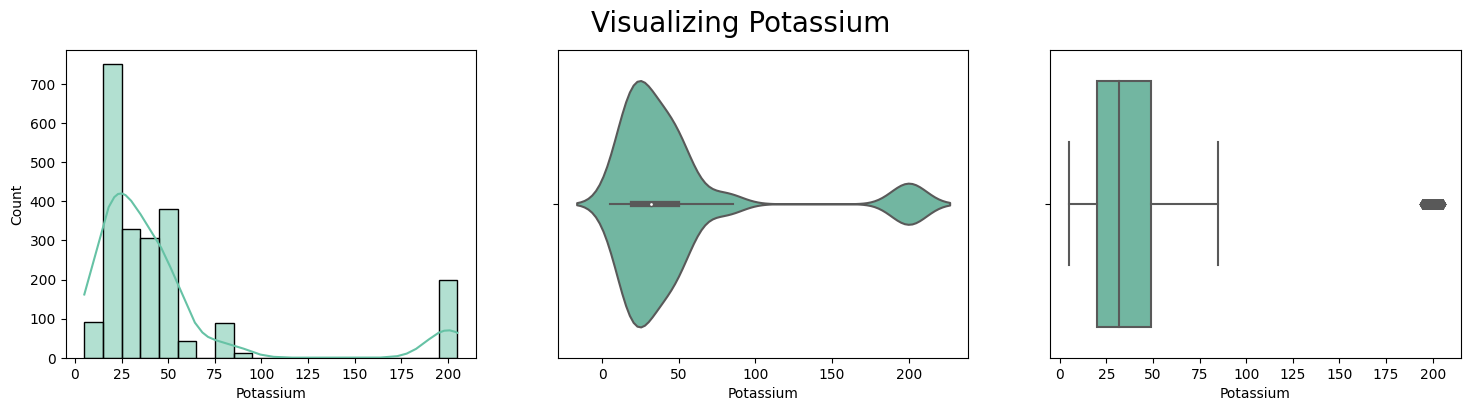

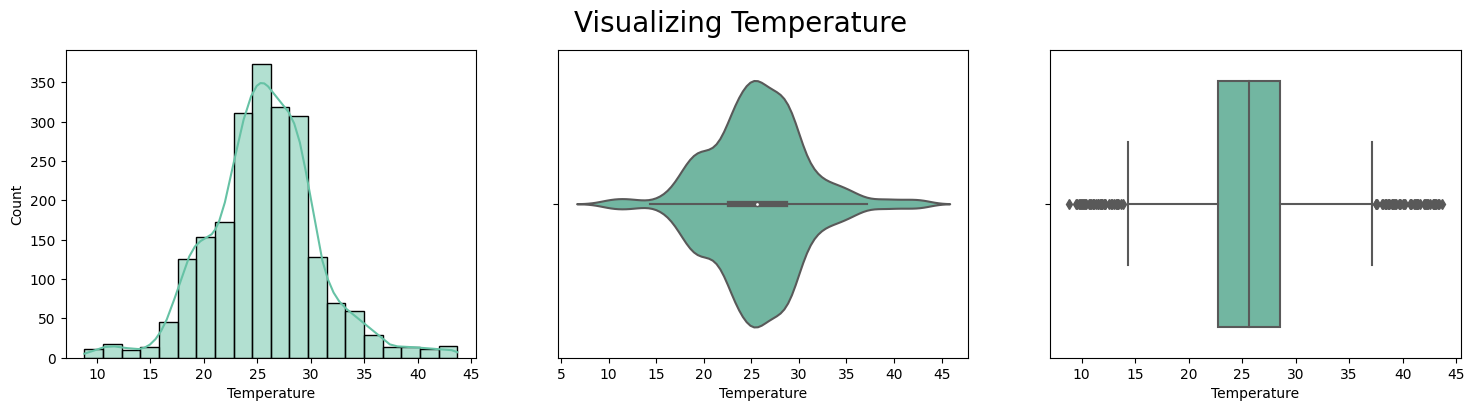

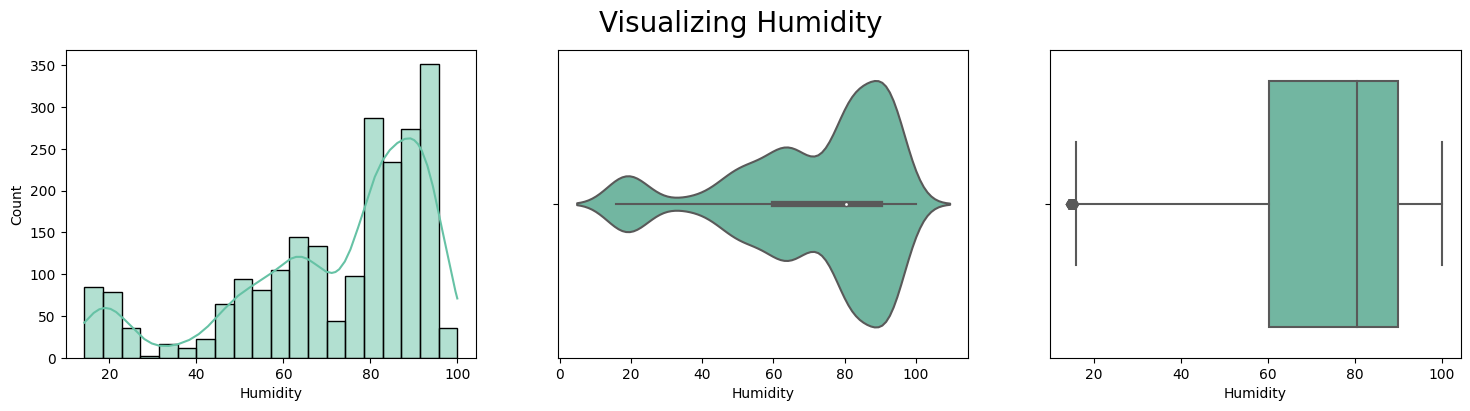

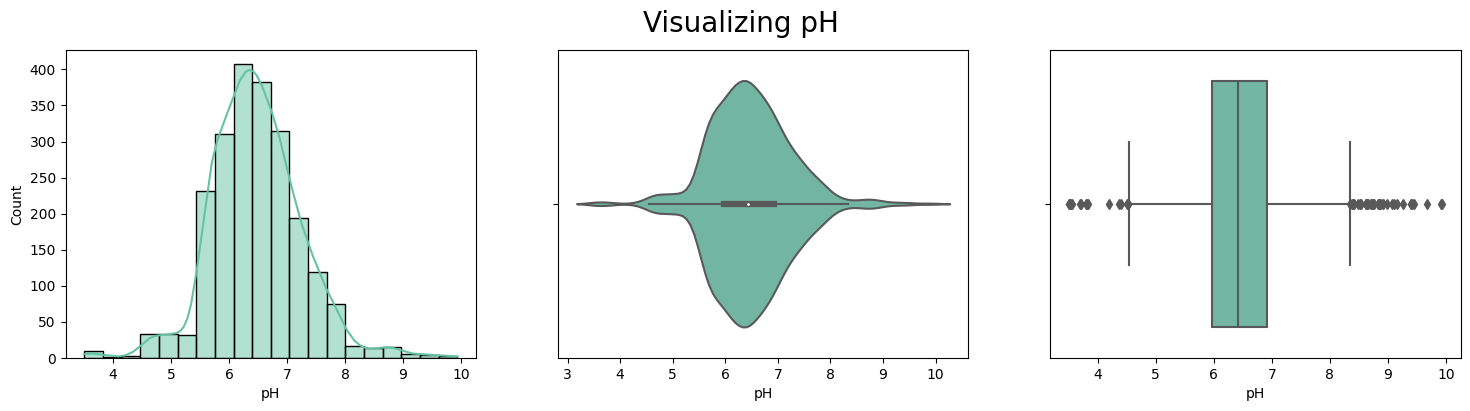

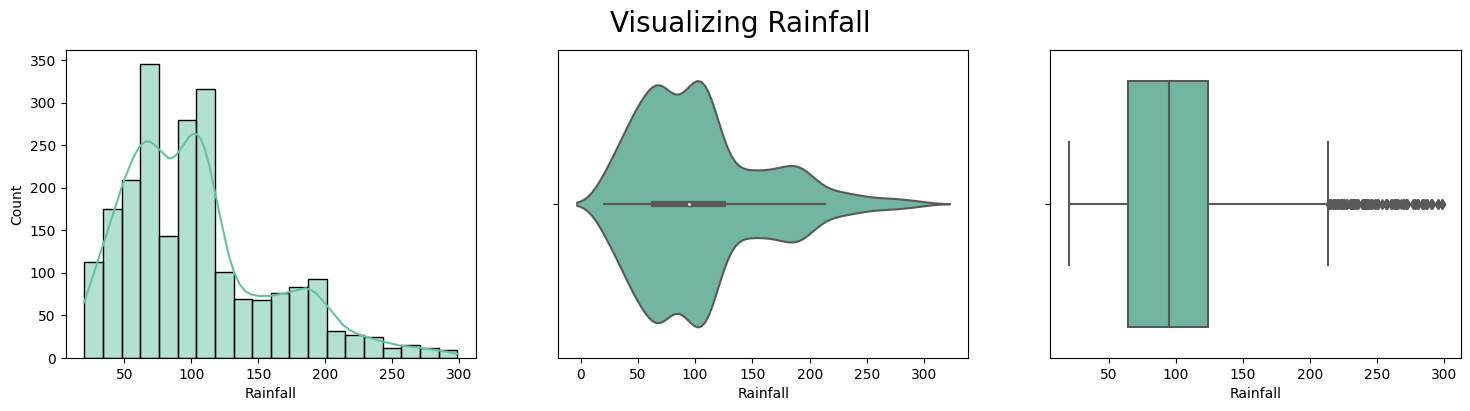

In [ ]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in crop_df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=crop_df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=crop_df,x=i,ax=ax[1])
    sns.boxplot(data=crop_df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

In [ ]:
grouped = crop_df.groupby(by='Label').mean().reset_index()
grouped

Label  Nitrogen  Phosphorus  Potassium  Temperature   Humidity  \
0         apple     20.80      134.22     199.89    22.630942  92.333383   
1        banana    100.23       82.01      50.05    27.376798  80.358123   
2     blackgram     40.02       67.47      19.24    29.973340  65.118426   
3      chickpea     40.09       67.79      79.92    18.872847  16.860439   
4       coconut     21.98       16.93      30.59    27.409892  94.844272   
5        coffee    101.20       28.74      29.94    25.540477  58.869846   
6        cotton    117.77       46.24      19.56    23.988958  79.843474   
7        grapes     23.18      132.53     200.11    23.849575  81.875228   
8          jute     78.40       46.86      39.99    24.958376  79.639864   
9   kidneybeans     20.75       67.54      20.05    20.115085  21.605357   
10       lentil     18.77       68.36      19.41    24.509052  64.804785   
11        maize     77.76       48.44      19.79    22.389204  65.092249   
12        mango     20.07       27.18      29.92    31.208770  50.156573   
13    mothbeans     21.44       48.01      20.23    28.194920  53.160418   
14     mungbean     20.99       47.28      19.87    28.525775  85.499975   
15    muskmelon    100.32       17.72      50.08    28.663066  92.342802   
16       orange     19.58       16.55      10.01    22.765725  92.170209   
17       papaya     49.88       59.05      50.04    33.723859  92.403388   
18   pigeonpeas     20.73       67.73      20.29    27.741762  48.061633   
19  pomegranate     18.87       18.75      40.21    21.837842  90.125504   
20         rice     79.89       47.58      39.87    23.689332  82.272822   
21   watermelon     99.42       17.00      50.22    25.591767  85.160375   

          pH    Rainfall  
0   5.929663  112.654779  
1   5.983893  104.626980  
2   7.133952   67.884151  
3   7.336957   80.058977  
4   5.976562  175.686646  
5   6.790308  158.066295  
6   6.912675   80.398043  
7   6.025937   69.611829  
8   6.732778  174.792798  
9   5.749411  105.919778  
10  6.927932   45.680454  
11  6.245190   84.766988  
12  5.766373   94.704515  
13  6.831174   51.198487  
14  6.723957   48.403601  
15  6.358805   24.689952  
16  7.016957  110.474969  
17  6.741442  142.627839  
18  5.794175  149.457564  
19  6.429172  107.528442  
20  6.425471  236.181114  
21  6.495778   50.786219

#**Top 5 Crops feature wise requirement**

In [ ]:
print(f'********************************')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'********************************')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'********************************')

********************************
Top 5 Most Nitrogen requiring crops:
********************************
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
********************************
Top 5 Most Phosphorus requiring crops:
********************************
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
********************************
Top 5 Most Potassium requiring crops:
********************************
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
********************************
Top 5 Most Temperature requiring crops:
********************************
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
********************************
Top 5 Most Humidity requiring crops:
********************************
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 9

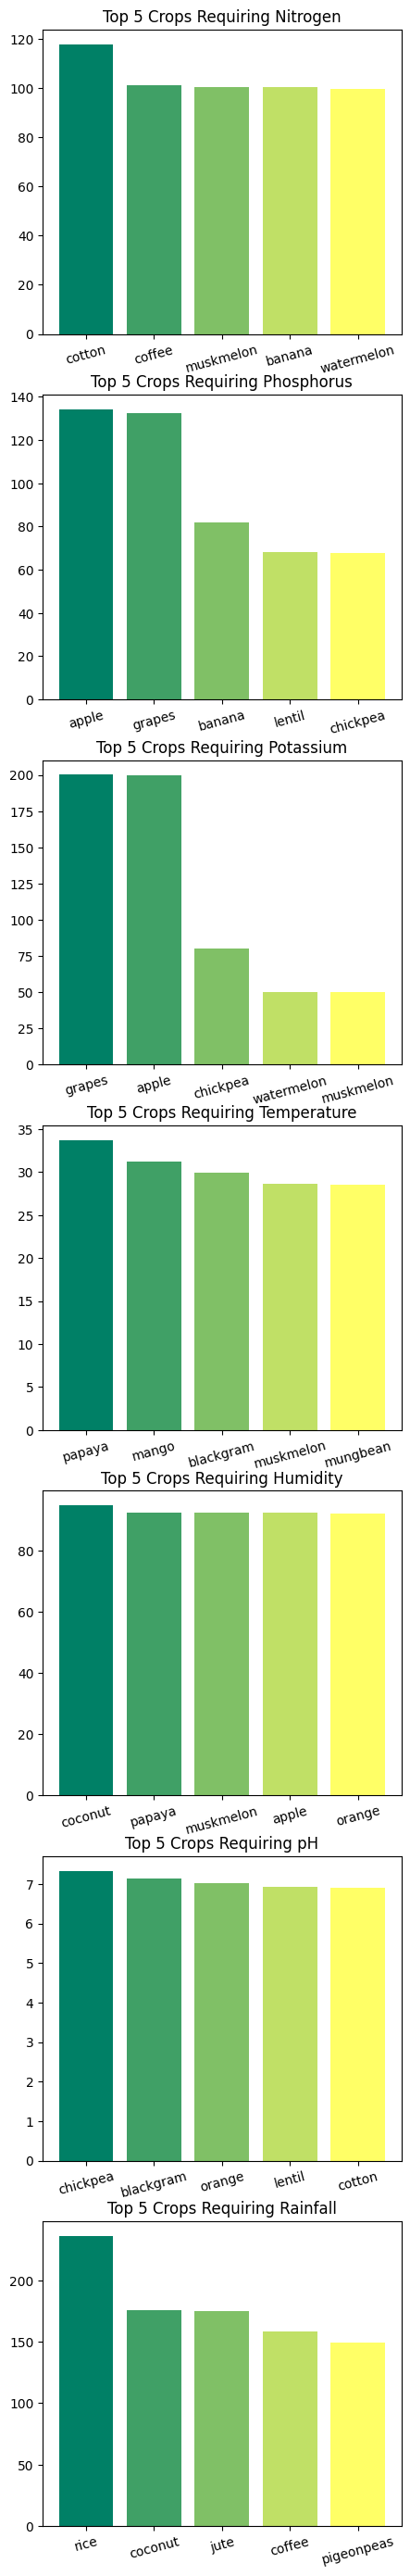

In [ ]:
import matplotlib.pyplot as plt

feature_columns = grouped.columns[1:]

num_rows = len(feature_columns)
num_cols = 1

colors = plt.cm.summer(np.linspace(0, 1, 5))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

for i, feature in enumerate(feature_columns):

    top_5_crops = grouped.sort_values(by=feature, ascending=False)[:5]

    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes

    ax.bar(top_5_crops['Label'], top_5_crops[feature], color = colors)
    ax.tick_params(axis='x', rotation=15)
    ax.set_title(f'Top 5 Crops Requiring {feature}')
    plt.savefig('top5_crops.png')

#**Bottom 5 Crops feature wise requirement**

In [ ]:
print(f'********************************')
for i in grouped.columns[1:]:
    print(f'Top 5 least {i} requiring crops:')
    print(f'********************************')
    for j ,k in grouped.sort_values(by=i)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'********************************')

********************************
Top 5 least Nitrogen requiring crops:
********************************
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
********************************
Top 5 least Phosphorus requiring crops:
********************************
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
********************************
Top 5 least Potassium requiring crops:
********************************
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
********************************
Top 5 least Temperature requiring crops:
********************************
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
********************************
Top 5 least Humidity requiring crops:
********************************
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295


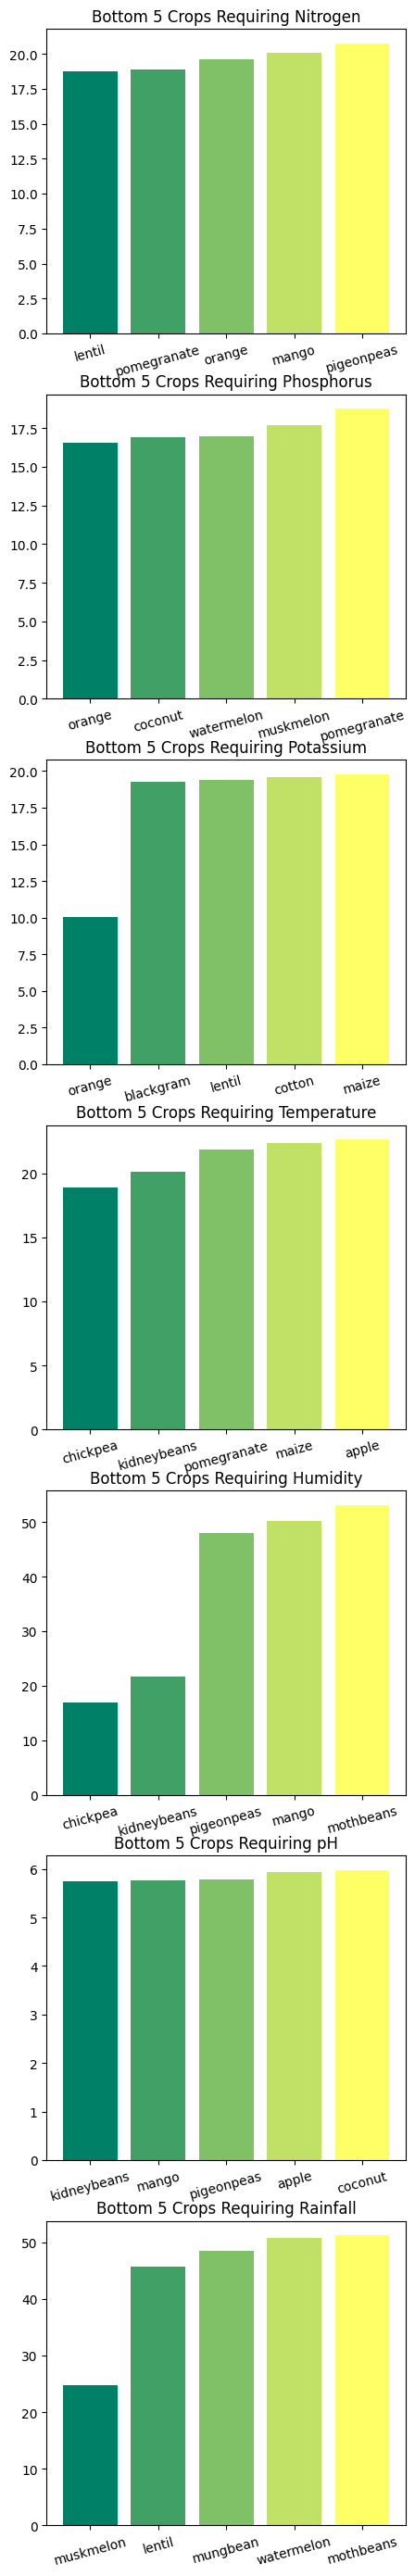

In [ ]:
import matplotlib.pyplot as plt

feature_columns = grouped.columns[1:]

num_rows = len(feature_columns)
num_cols = 1

colors = plt.cm.summer(np.linspace(0, 1, 5))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

for i, feature in enumerate(feature_columns):

    bottom_5_crops = grouped.sort_values(by=feature, ascending=True)[:5]

    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes

    ax.bar(bottom_5_crops['Label'], bottom_5_crops[feature], color = colors)
    ax.tick_params(axis='x', rotation=15)
    ax.set_title(f'Bottom 5 Crops Requiring {feature}')
    plt.savefig('bottom5_crops.png')

In [ ]:
sns.pairplot(data=crop_df,hue='Label')
plt.savefig('pairplot.png')
plt.show()

In [ ]:
figure = plt.figure(figsize=(12, 6))
sns.heatmap(crop_df.corr(),annot=True)
plt.savefig('heatmap.png')

<ipython-input-89-ec9812b5a805>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
crop_df_pca=pca.fit_transform(crop_df.drop(['Label'],axis=1))
crop_df_pca=pd.DataFrame(crop_df_pca)
fig = px.scatter(x=crop_df_pca[0],y=crop_df_pca[1],color=crop_df['Label'],title="Decomposed using PCA")
fig.show()

In [ ]:
pca3=PCA(n_components=3)
crop_df_pca3=pca3.fit_transform(crop_df.drop(['Label'],axis=1))
crop_df_pca3=pd.DataFrame(crop_df_pca3)
fig = px.scatter_3d(x=crop_df_pca3[0],y=crop_df_pca3[1],z=crop_df_pca3[2],color=crop_df['Label'],title=f"Variance Explained : {pca3.explained_variance_ratio_.sum() * 100}%")
fig.show()

In [ ]:
fig = px.scatter(x=crop_df['Nitrogen'],y=crop_df['Phosphorus'],color=crop_df['Label'],title="Nitrogen VS Phosphorus")
fig.show()

In [ ]:
fig = px.scatter(x=crop_df['Phosphorus'],y=crop_df['Potassium'],color=crop_df['Label'],title="Phosphorus VS Potassium")
fig.show()

#**Hisplots**

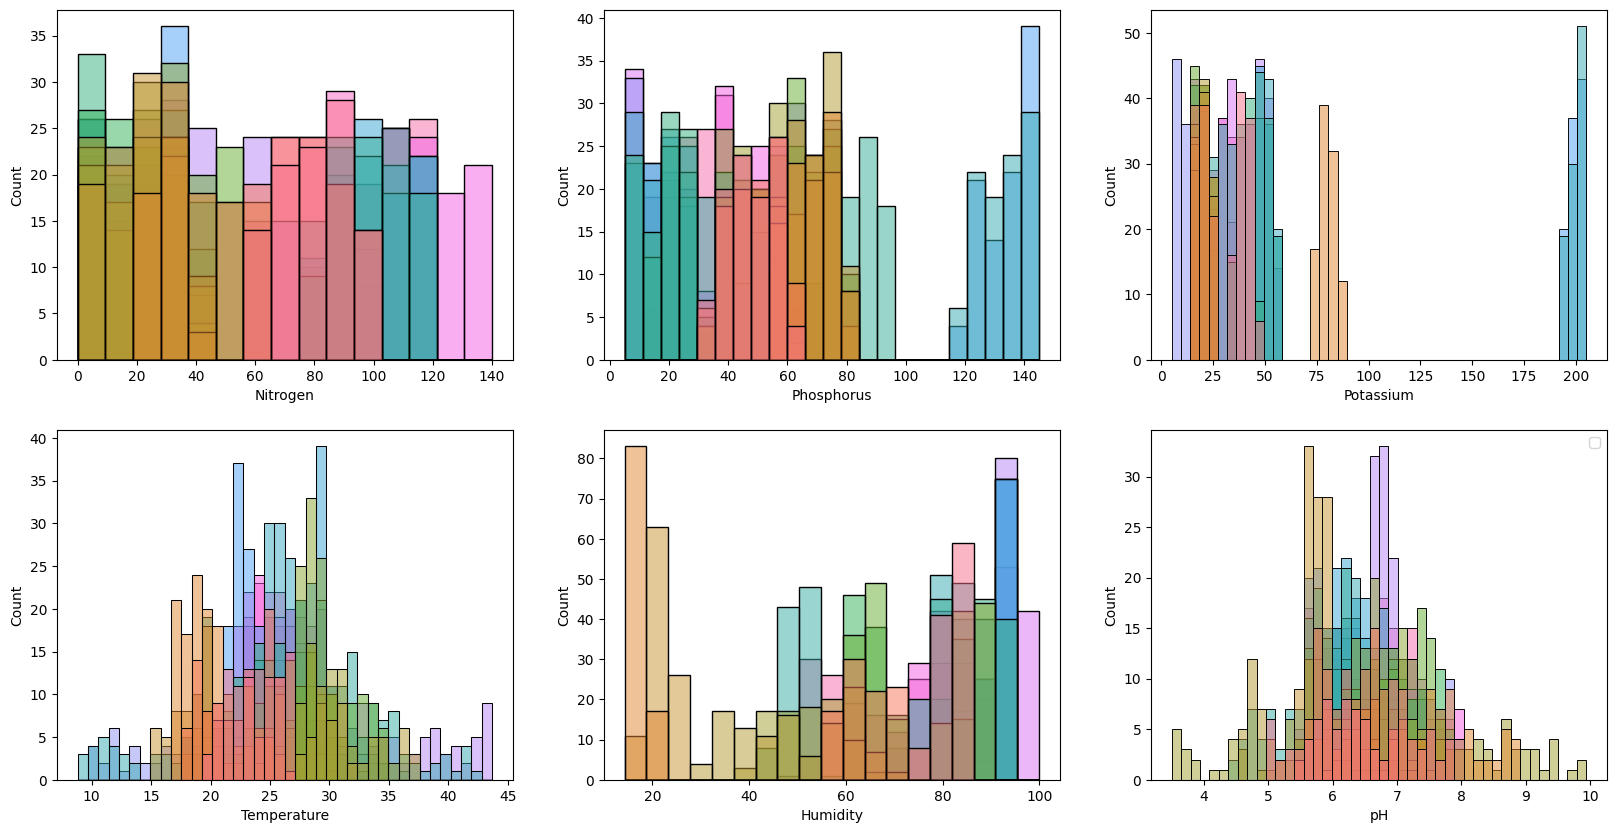

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for col, ax in zip(crop_df.columns, axes.flatten()):
    sns.histplot(data=crop_df, x=col, hue='Label', ax=ax, legend=False)
plt.legend(loc='upper right')
plt.savefig('histograms.png')

#**Boxplots**

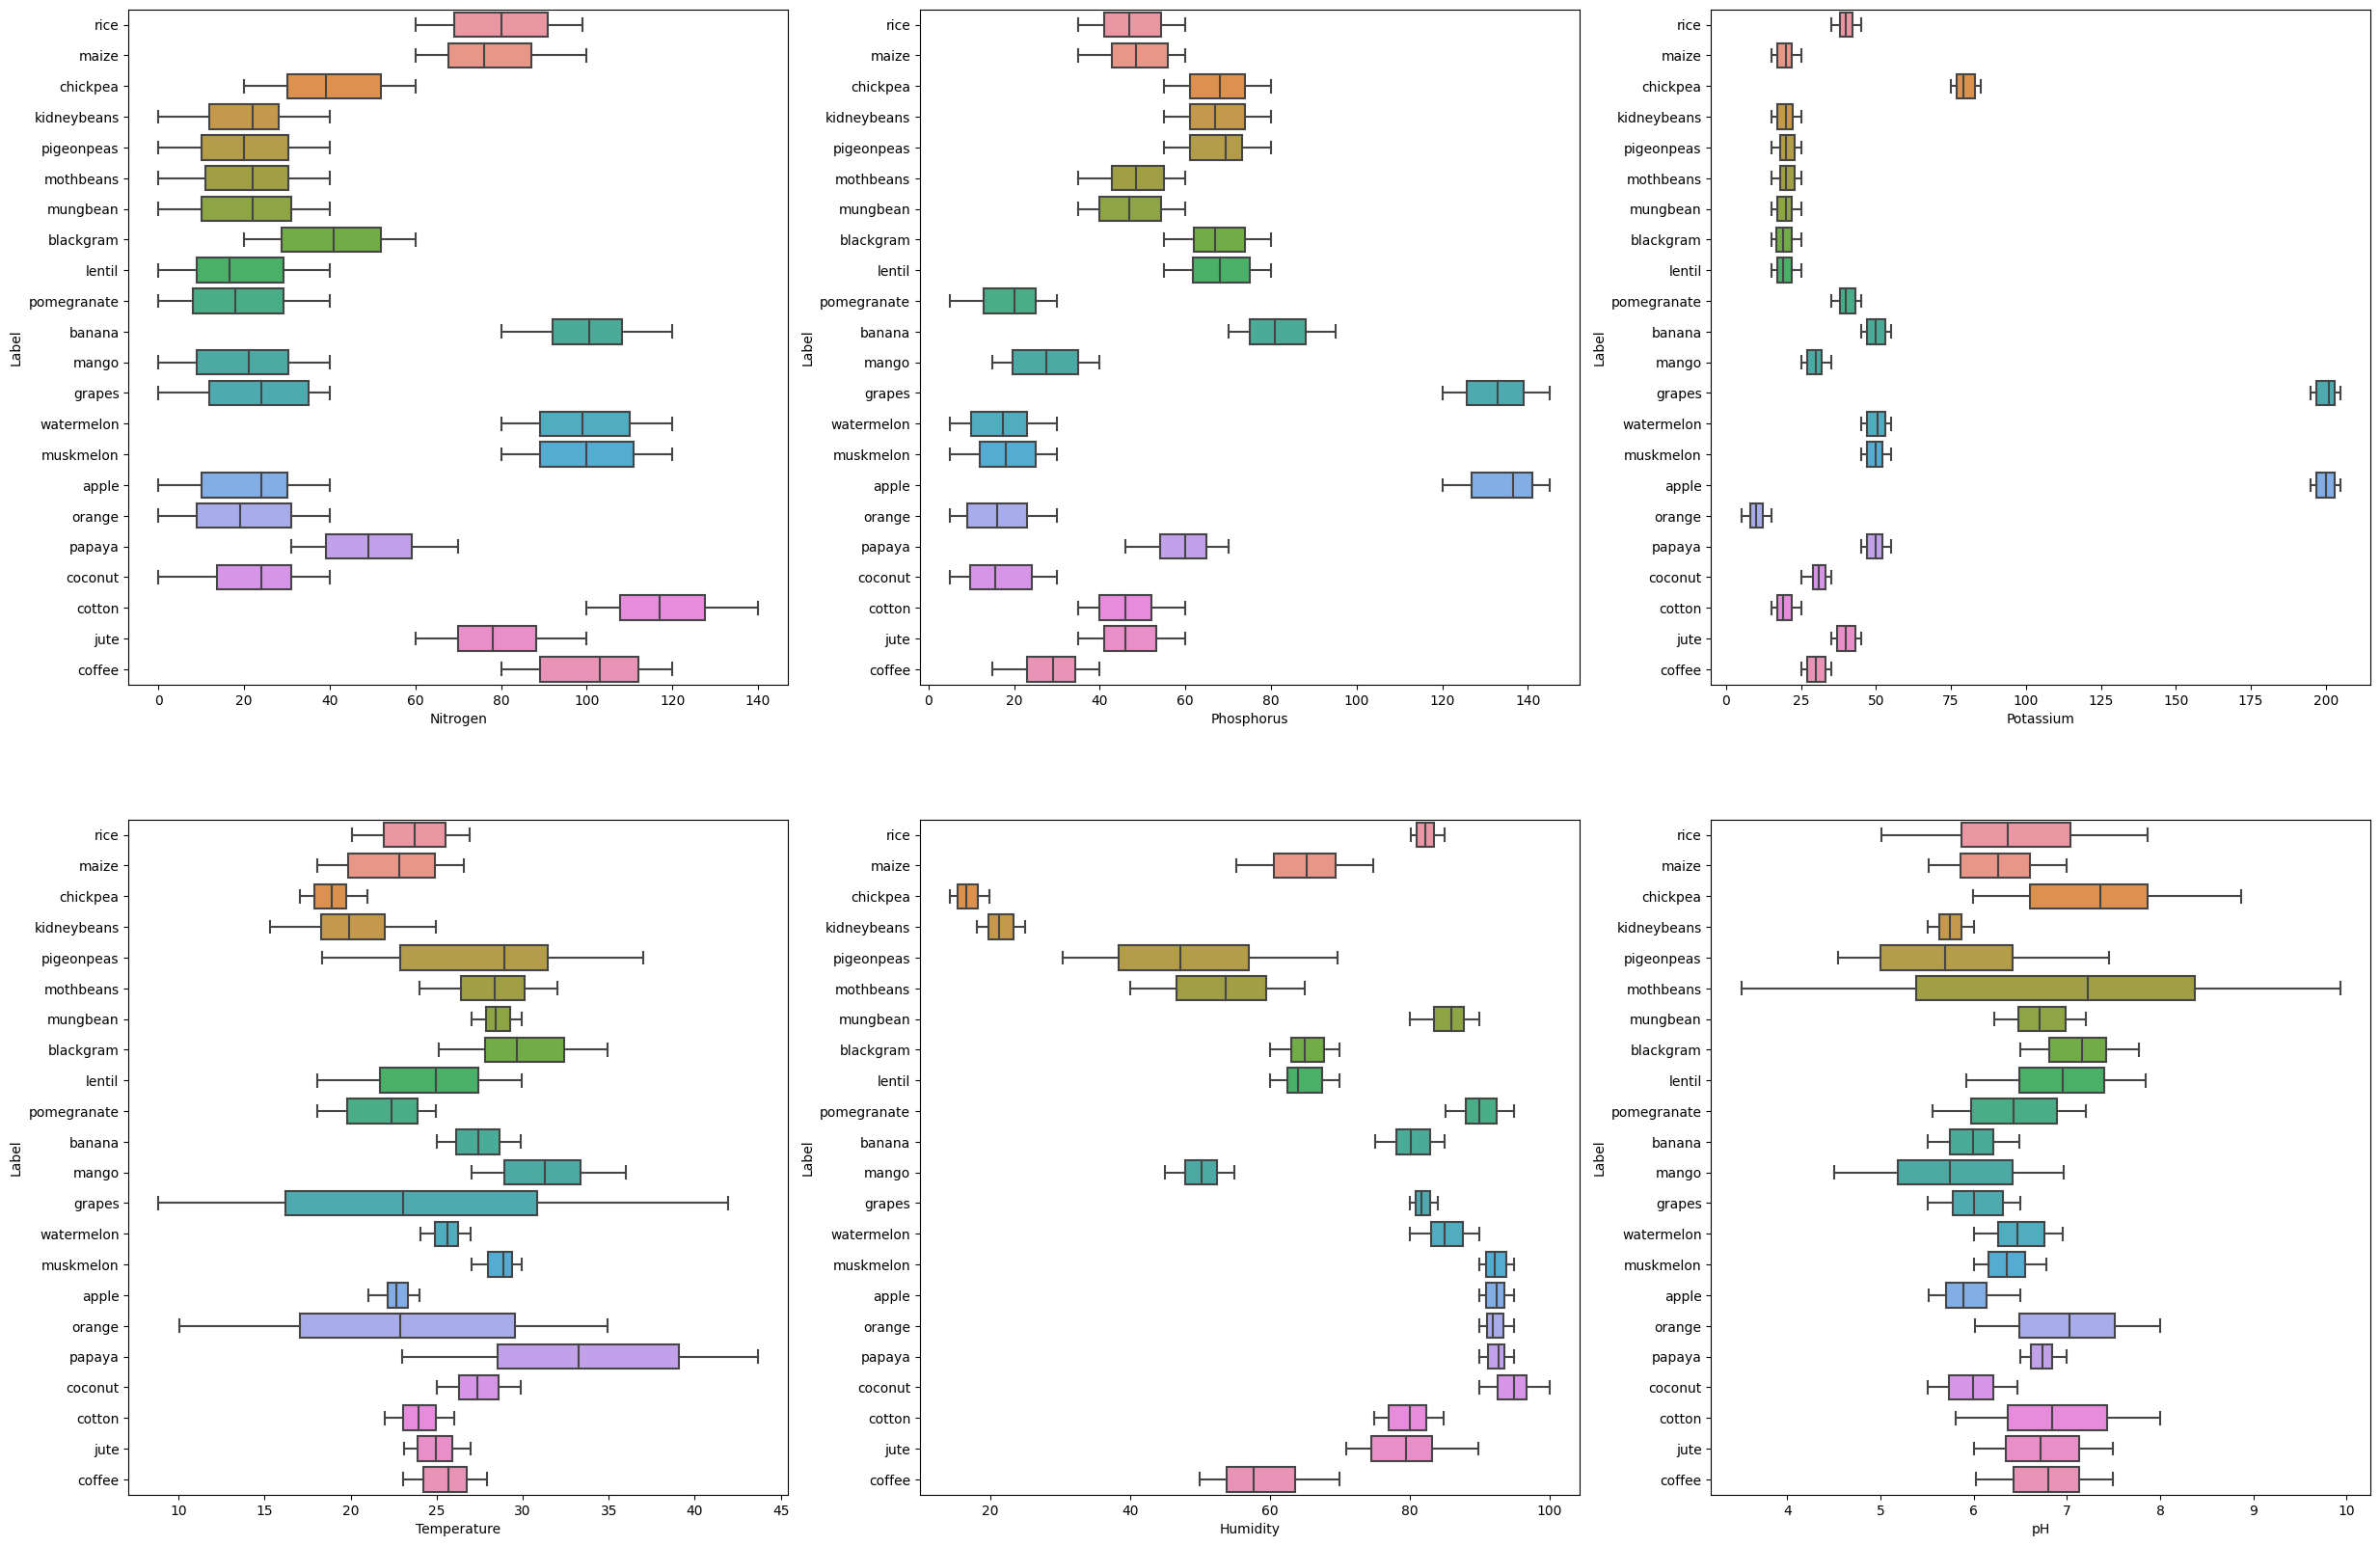

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(30,20))

for col, ax in zip(crop_df.columns, axes.flatten()):
    sns.boxplot(data=crop_df, x=col, y='Label', ax=ax)
    plt.savefig('Boxplots.png')

#**Models**

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

multiclass_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Multilayer Perceptron': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False, iterations=500, depth=10, learning_rate=0.05, loss_function='MultiClass'),
}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true,y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro')
}

le = LabelEncoder()
crop_df['Label'] = le.fit_transform(crop_df['Label'])

In [ ]:
X = crop_df.drop(['Label'], axis=1)
y = crop_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
fitted_models = {}
model_names = ['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','AdaBoost','Bagging','SVM','K-Nearest Neighbors','Naive Bayes','Multilayer Perceptron','XGBoost','LightGBM','CatBoost']
scored_metrics = {model_name: {'Accuracy': None, 'Precision': None, 'Recall': None} for model_name in model_names}

for model_name, model in multiclass_models.items():
    fitted_models[model_name] = model.fit(X_train, y_train)
    for metric_name, metric in metrics.items():
        scored_metrics[model_name][metric_name] = metric(y_test, model.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.134845
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.180655
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.120030
[LightGB

In [ ]:
pd.DataFrame(scored_metrics).style.background_gradient(cmap='Greens')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have your 'scored_metrics' dictionary containing model performance scores

# Create a DataFrame from the 'scored_metrics' dictionary
score_df = pd.DataFrame(scored_metrics).T

# Define the model names and metrics you want to plot
model_names = score_df.index
metrics_to_plot = ['Accuracy', 'Precision', 'Recall']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics_to_plot), ncols=1, figsize=(10, 12))

# Iterate through metrics and create bar plots
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    sns.barplot(x=score_df.index, y=score_df[metric], ax=ax, palette="magma")
    ax.set_title(f'{metric} Scores for Different Models')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.savefig('model_scores.png')
plt.show()
